In [1]:
from typing import Any

import matplotlib.pyplot as plt
import mlflow
import mlflow.artifacts
import numpy as np
import pandas as pd
import seaborn as sns
from mlflow.store.entities.paged_list import PagedList
from mlflow.tracking import MlflowClient

from cate.infra.mlflow import REMOTE_TRACKING_URI


In [2]:
experiment_name = "base_pattern"

In [3]:
mlflow.set_tracking_uri(REMOTE_TRACKING_URI)
client = MlflowClient(tracking_uri=REMOTE_TRACKING_URI)

In [4]:
experiment = client.search_experiments(filter_string=f"name='{experiment_name}'")[0]

In [5]:
def get_child_runs(parent_run_id) -> PagedList:
    return client.search_runs(
        experiment.experiment_id,
        filter_string=f"tags.mlflow.parentRunId='{parent_run_id}'",
    )

In [6]:
def parse_run(run) -> dict[str, Any]:
    _metrics = run.to_dictionary()["data"]["metrics"]
    _tags = run.to_dictionary()["data"]["tags"]
    metrics_keys = [
        "auuc",
        "uplift_at_10",
        "uplift_at_20",
        "uplift_at_30",
        "uplift_at_40",
        "uplift_at_50",
        "uplift_at_60",
        "uplift_at_70",
        "uplift_at_80",
        "uplift_at_90",
    ]
    tags_keys = ["model", "dataset"]
    return {
        **{k: _metrics[k] for k in metrics_keys},
        **{k: _tags[k] for k in tags_keys},
    }

In [7]:
dataset_names = ("criteo", "lenta", "megafon", "hillstorm")
parent_run_ids = [
    "2c3b94270d904d659f34386dae502909",
    "d15e430478a54a23b1a04408591a9b06",
    "f5804c7e54654b15900de2f36cebe6eb",
    "e98550a7145f4f6bbf3739757afa3c89",
]

In [19]:
df = None
for dataset_name, parent_run_id in zip(dataset_names, parent_run_ids):
    runs = get_child_runs(parent_run_id)
    data = [parse_run(run) for run in runs]
    _df = pd.DataFrame(data)
    if df is None:
        df = _df
    else:
        df = pd.concat([df, _df])
df = df.reset_index(drop=True)

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder_model = LabelEncoder()
label_encoder_dataset = LabelEncoder()

encoded_df = df.copy()
encoded_df['model'] = label_encoder_model.fit_transform(df['model'])
encoded_df["dataset"] = label_encoder_dataset.fit_transform(df["dataset"])

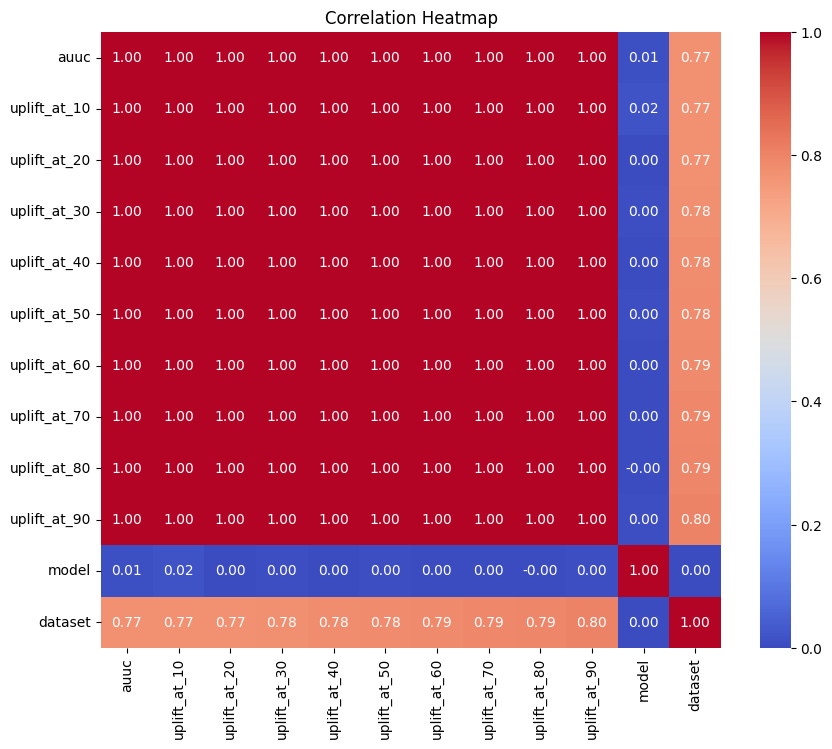

In [21]:
corr = encoded_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
df

,auuc,uplift_at_10,uplift_at_20,uplift_at_30,uplift_at_40,uplift_at_50,uplift_at_60,uplift_at_70,uplift_at_80,uplift_at_90,model,dataset
0,0.045739,0.007262,0.004338,0.003104,0.002393,0.001947,0.001643,0.001421,0.001248,0.001116,tlearner,criteo
1,0.052503,0.008022,0.004808,0.003427,0.002638,0.002147,0.001804,0.001550,0.001364,0.001224,slearner,criteo
2,0.051526,0.007768,0.004565,0.003403,0.002602,0.002128,0.001792,0.001549,0.001377,0.001238,rlearner,criteo
3,0.049980,0.007637,0.004623,0.003279,0.002573,0.002091,0.001756,0.001515,0.001338,0.001205,xlearner,criteo
4,0.053790,0.008064,0.004831,0.003468,0.002669,0.002178,0.001842,0.001592,0.001411,0.001264,drlearner,criteo
5,0.017894,0.007991,0.002796,0.003455,0.002827,0.002232,0.002684,0.003793,0.003975,0.004684,tlearner,lenta
6,0.060887,0.009428,0.004884,0.003011,0.002262,0.005392,0.006188,0.006445,0.006244,0.006020,slearner,lenta
7,0.001479,-0.000168,-0.001074,0.001785,0.006098,0.004630,0.004457,0.005121,0.004992,0.005420,rlearner,lenta
8,0.066990,0.008103,0.003685,0.005436,0.004872,0.005454,0.006118,0.006735,0.005803,0.005869,xlearner,lenta
9,0.060862,0.006856,0.005927,0.005291,0.005113,0.005933,0.006617,0.005952,0.006022,0.006285,drlearner,lenta


In [26]:
evaluation_index = "auuc"
data = df.loc[:, [evaluation_index, "model", "dataset"]].pivot_table(
    index="dataset", columns="model", values=evaluation_index
)

In [27]:
data

model,drlearner,rlearner,slearner,tlearner,xlearner
dataset,,,,,
criteo,0.053790,0.051526,0.052503,0.045739,0.049980
hillstorm,-0.009266,0.029000,0.009471,0.044402,0.021992
lenta,0.060862,0.001479,0.060887,0.017894,0.066990
megafon,3.290144,3.332212,3.298296,3.471237,3.354283


In [24]:
row_means = data.mean(axis=1)
data = data.sub(row_means, axis=0)
data

model,drlearner,rlearner,slearner,tlearner,xlearner
dataset,,,,,
criteo,0.003082,0.000818,0.001795,-0.004968,-0.000727
hillstorm,-0.028386,0.009880,-0.009649,0.025282,0.002872
lenta,0.019240,-0.040144,0.019265,-0.023728,0.025367
megafon,-0.059090,-0.017023,-0.050938,0.122003,0.005049


<Axes: xlabel='dataset'>

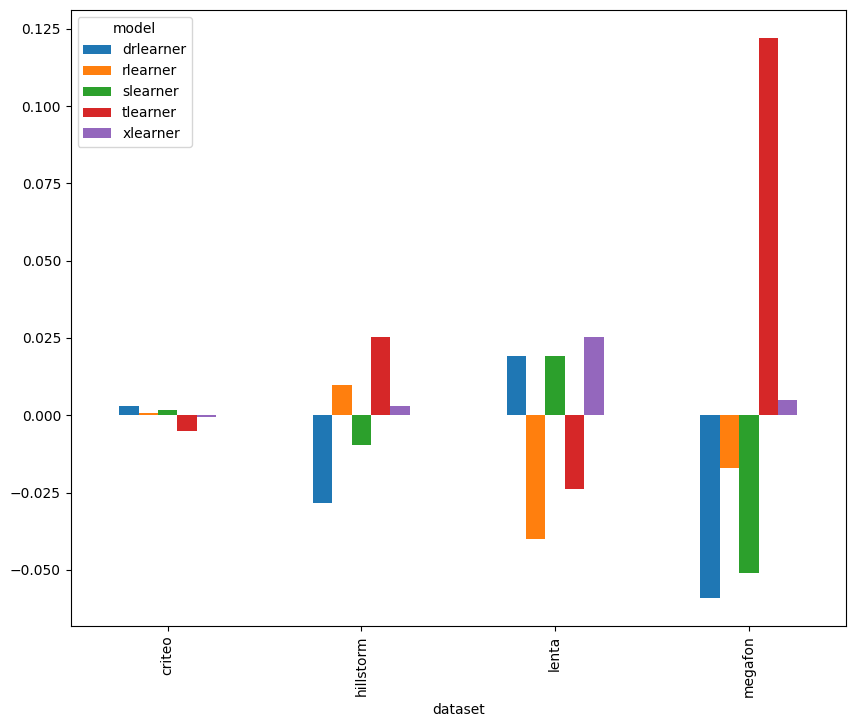

In [25]:
data.plot(kind="bar", stacked=False, figsize=(10, 8))